<a href="https://colab.research.google.com/github/raghavendhar-899/StockPrediction_Treeregressor/blob/master/StockPredic_Treeregressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# impoert reguired lib
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader.data as web
plt.style.use('bmh')

In [80]:
# get perv data
start = dt.datetime(2000, 5, 1)
end = dt.datetime.now()
# df = web.DataReader("TSLA", start, end)
df = web.get_data_yahoo('RELIANCE.NS', start, end)
df.reset_index(inplace=True)
# df.set_index("Date", inplace=True)
# df = df.drop("Symbol", axis=1)
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2000-05-02,55.393799,50.801701,54.355099,51.410900,105156355.0,23.228067
1,2000-05-03,52.145000,48.294800,51.075001,51.231201,88097873.0,23.146881
2,2000-05-04,53.566299,51.699799,51.699799,52.668201,72521150.0,23.796133
3,2000-05-05,53.347599,51.246899,52.871300,52.379200,71351697.0,23.665560
4,2000-05-08,52.637001,50.340900,51.699799,50.606499,37718360.0,22.864630
...,...,...,...,...,...,...,...
4956,2020-05-26,1449.699951,1416.300049,1448.150024,1424.050049,15329472.0,1424.050049
4957,2020-05-27,1454.000000,1412.000000,1431.000000,1445.550049,16460756.0,1445.550049
4958,2020-05-28,1479.750000,1449.000000,1455.000000,1472.250000,18518271.0,1472.250000
4959,2020-05-29,1472.000000,1452.650024,1468.000000,1464.400024,18470390.0,1464.400024


In [81]:
# get no:of Trading days
df.shape

(4961, 7)

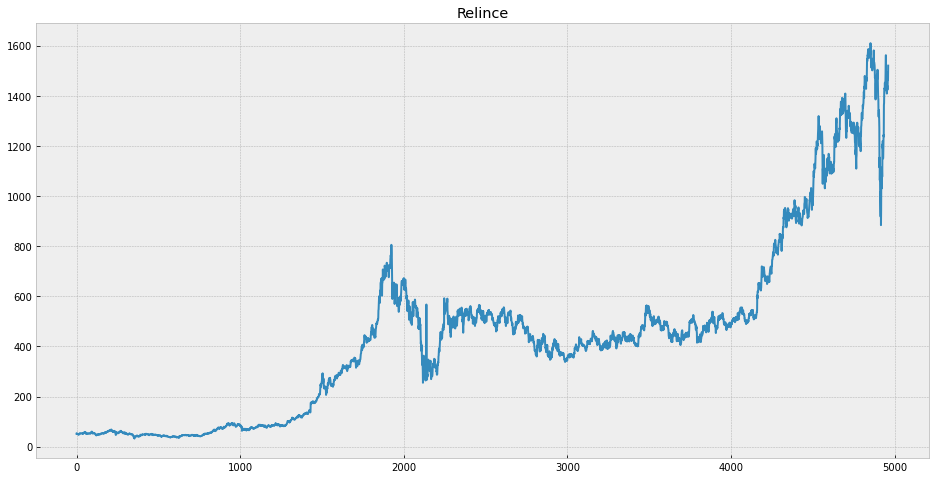

In [82]:
# graph of close price
plt.figure(figsize=(16,8))
plt.title('Relince')
plt.plot(df["Close"])

In [0]:
# get the close price
future_days = 10
for i in range(future_days):
  df=df[["Close"]].append([0])
df.reset_index(inplace=True)

df=df[["Close"]]

In [84]:
df

,Close
0,51.410900
1,51.231201
2,52.668201
3,52.379200
4,50.606499
...,...
4966,NaN
4967,NaN
4968,NaN
4969,NaN


In [85]:
# create variable to predict 'x' days

# create a nwe colum (target data) shifted 'x' units/days up
df["prediction"]=df[["Close"]].shift(-future_days)

df[-121:]

,Close,prediction
4850,1562.699951,1509.599976
4851,1575.849976,1535.300049
4852,1609.949951,1537.150024
4853,1599.099976,1501.500000
4854,1571.400024,1524.599976
...,...,...
4966,NaN,NaN
4967,NaN,NaN
4968,NaN,NaN
4969,NaN,NaN


In [86]:
# create the feature data set (x) and convert it to a numpy array and remove the 'x rows/days
x= np.array(df.drop(['prediction'],1))[:-future_days*2]
print(len(x))
x

4951


array([[  51.41090012],
       [  51.23120117],
       [  52.66820145],
       ...,
       [1496.44995117],
       [1435.94995117],
       [1459.40002441]])

In [87]:
# create the target data set (y)  and convert it to a numpy arrayand get all of the target values except the laste 'x' rows/dayes
y=np.array(df['prediction'])[:-future_days*2]
y

array([  49.57559967,   49.80210114,   48.4353981 , ..., 1472.25      ,
       1464.40002441, 1520.34997559])

In [0]:
# split 75% data for training and 25% for testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.05)
# print(x_train)
# print()
# print(x_test)
# print()
# print(y_train)
# print()
# print(y_test)
# print()

In [0]:
# create model
# decision tree regressor mode
# tree=DecisionTreeRegressor().fit(x,y)
tree=DecisionTreeRegressor().fit(x_train,y_train)
# linear regression model
# lr=LinearRegression().fit(x,y)
lr=LinearRegression().fit(x_train,y_train)

In [90]:
#  get the last x rows from future data set
# future_days=100
x_future=df.drop(['prediction'],1)[:-future_days]
x_future=x_future.tail(future_days*2)
x_future=np.array(x_future)
x_future

array([[1421.7199707 ],
       [1446.93005371],
       [1447.0300293 ],
       [1492.80004883],
       [1547.13000488],
       [1561.98999023],
       [1465.35998535],
       [1496.44995117],
       [1435.94995117],
       [1459.40002441],
       [1440.75      ],
       [1408.90002441],
       [1433.69995117],
       [1441.25      ],
       [1431.55004883],
       [1424.05004883],
       [1445.55004883],
       [1472.25      ],
       [1464.40002441],
       [1520.34997559]])

In [91]:
#  show model tree predictoin
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
# show model linear regression prediction
lr_prediction=lr.predict(x_future)
print(lr_prediction)

[1440.75       1408.90002441 1433.69995117 1441.25       1431.55004883
 1424.05004883 1445.55004883 1472.25       1464.40002441 1520.34997559
 1474.15002441 1267.40002441 1444.94995117 1474.15002441 1427.80004883
 1440.75       1561.55004883 1569.84997559 1470.84997559 1433.65002441]

[1424.47867323 1449.69341252 1449.79340657 1495.57187978 1549.91187053
 1564.77460051 1468.12674815 1499.22245626 1438.71128196 1462.16568641
 1443.51221735 1411.6563591  1436.46086639 1444.0123097  1434.31056696
 1426.80918172 1448.31315275 1475.01803538 1467.16660991 1523.12689499]


            Close  prediction  predictions
4951  1440.750000         NaN  1440.750000
4952  1408.900024         NaN  1408.900024
4953  1433.699951         NaN  1433.699951
4954  1441.250000         NaN  1441.250000
4955  1431.550049         NaN  1431.550049
4956  1424.050049         NaN  1424.050049
4957  1445.550049         NaN  1445.550049
4958  1472.250000         NaN  1472.250000
4959  1464.400024         NaN  1464.400024
4960  1520.349976         NaN  1520.349976
4961          NaN         NaN  1474.150024
4962          NaN         NaN  1267.400024
4963          NaN         NaN  1444.949951
4964          NaN         NaN  1474.150024
4965          NaN         NaN  1427.800049
4966          NaN         NaN  1440.750000
4967          NaN         NaN  1561.550049
4968          NaN         NaN  1569.849976
4969          NaN         NaN  1470.849976
4970          NaN         NaN  1433.650024


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


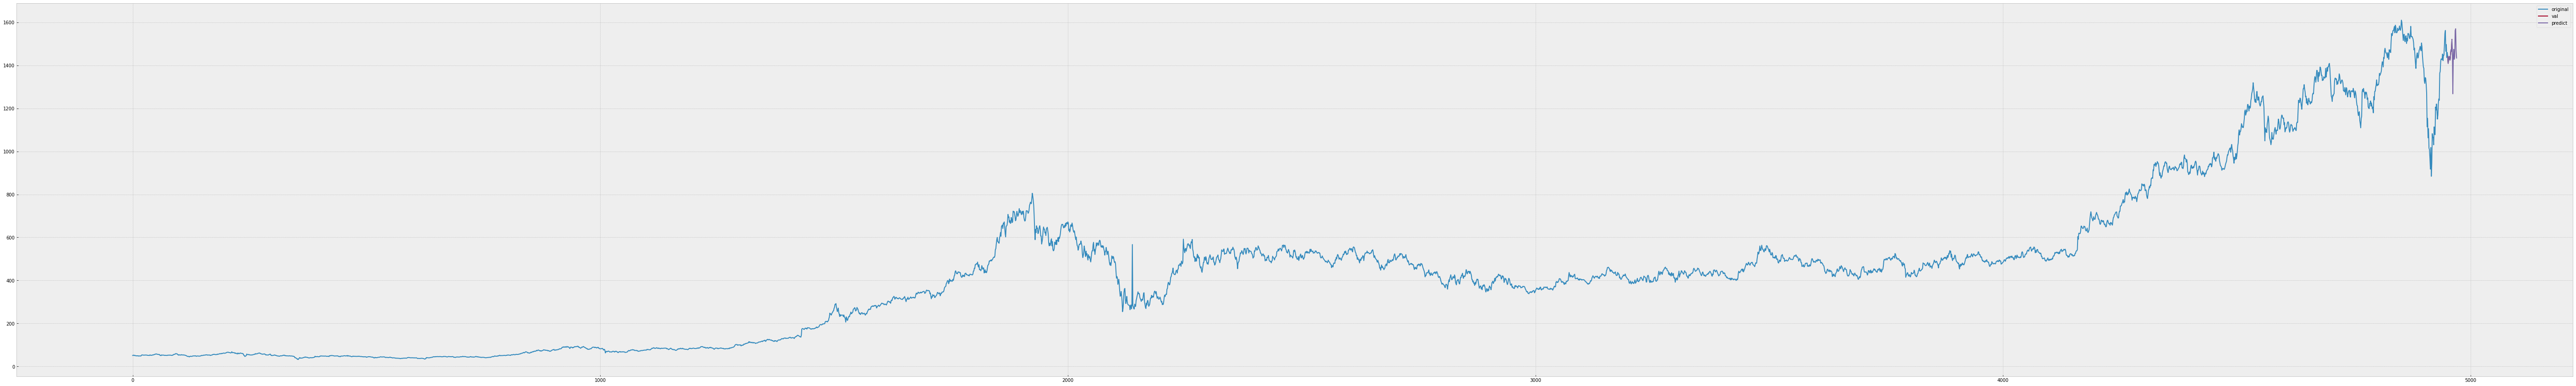

In [92]:
# visualize data for tree
predictions = tree_prediction
# print(df[-100:])
valid=df[x.shape[0]:]

valid['predictions']=predictions
print(valid[-50:])
plt.figure(figsize=(100,15))
plt.plot(df['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['original','val','predict'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


            Close  prediction  predictions
4951  1440.750000         NaN  1424.478673
4952  1408.900024         NaN  1449.693413
4953  1433.699951         NaN  1449.793407
4954  1441.250000         NaN  1495.571880
4955  1431.550049         NaN  1549.911871
4956  1424.050049         NaN  1564.774601
4957  1445.550049         NaN  1468.126748
4958  1472.250000         NaN  1499.222456
4959  1464.400024         NaN  1438.711282
4960  1520.349976         NaN  1462.165686
4961          NaN         NaN  1443.512217
4962          NaN         NaN  1411.656359
4963          NaN         NaN  1436.460866
4964          NaN         NaN  1444.012310
4965          NaN         NaN  1434.310567
4966          NaN         NaN  1426.809182
4967          NaN         NaN  1448.313153
4968          NaN         NaN  1475.018035
4969          NaN         NaN  1467.166610
4970          NaN         NaN  1523.126895


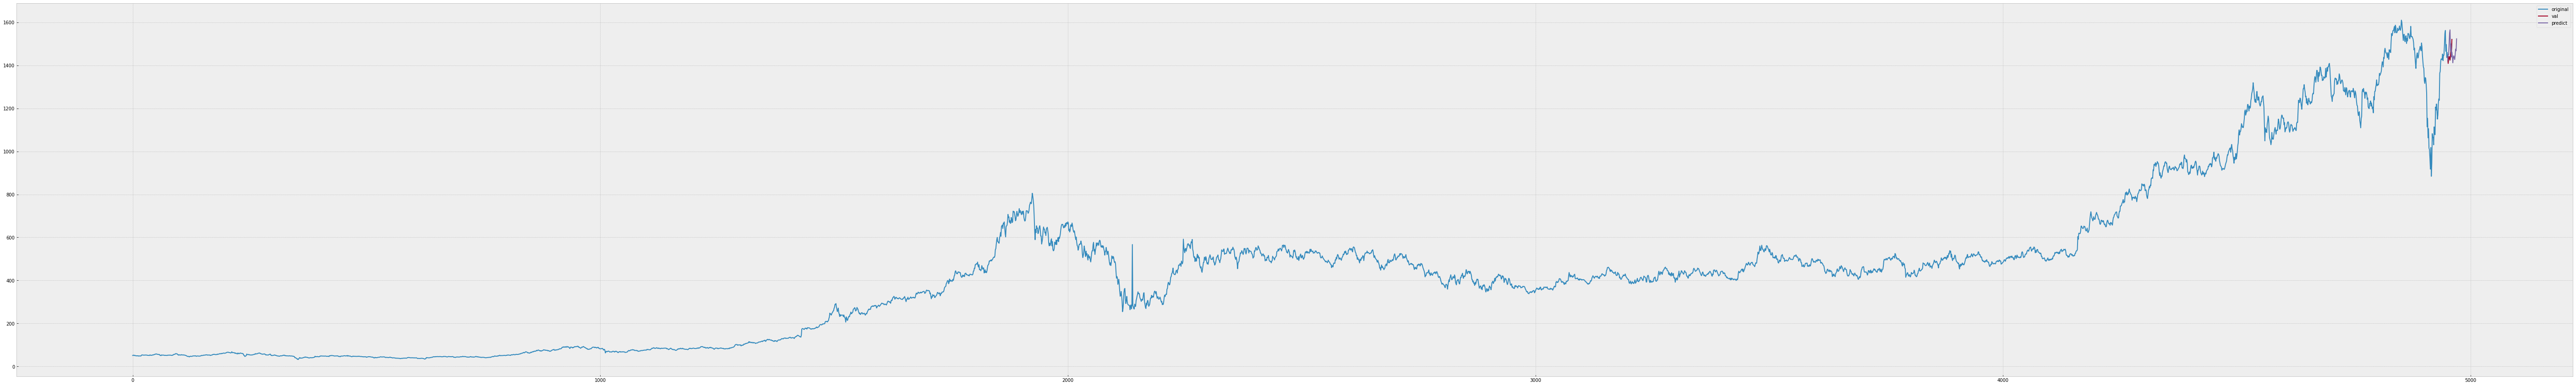

In [93]:
# visualize data for linear regresion
predictions = lr_prediction

valid=df[x.shape[0]:]
valid['predictions']=predictions
print(valid[-50:])

plt.figure(figsize=(100,15))
plt.plot(df['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['original','val','predict'])
plt.show()